### GA for finding 1-array

In [58]:
import numpy as np
import random
import types
class ECircuit():
    def __init__(self, circuit, task: types.FunctionType) -> None:
        self.circuit = circuit
        self.task = task
        self.fitness = 1
        self.status = 'uncompile'
        self.length = 0
        self.compile()
        return
    def compile(self):
        self.fitness = self.task(self.circuit)
        self.length = self.circuit.shape[0]
        self.status = 'compiled'
        return
    def mutate(self):
        random_index = random.randint(0, self.length - 1)
        self.circuit[random_index] = 1 - self.circuit[random_index]
        return 
        
    def crossover(self, circuit2, percent_point):
        point = int(percent_point*self.length)
        new_circuit1 = ECircuit(np.concatenate((self.circuit[:point], circuit2.circuit[point:]), axis = 0), fitness)
        new_circuit2 = ECircuit(np.concatenate((circuit2.circuit[:point], self.circuit[point:]), axis = 0), fitness)
        return new_circuit1, new_circuit2
def fitness(circuit):
    return circuit.sum(axis = 0)
   
def create_population(num_circuit, chromosome_length):
    population = []
    for _ in range(num_circuit):
        random_array = np.array([random.randint(0, 1) for _ in range(chromosome_length)])
        population.append(ECircuit(random_array, fitness))
    return population

In [67]:

def random_mutate(population, prob):
    random_circuit_index = np.random.randint(0, len(population))
    random_value = random.random()
    if random_value < prob:
        population[random_circuit_index].mutate()
    return population
def fight(population):
    circuits = random.sample(population, 2)
    return circuits[0] if circuits[0].fitness > circuits[1].fitness else circuits[1]

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
End best score, percent target: 94.5


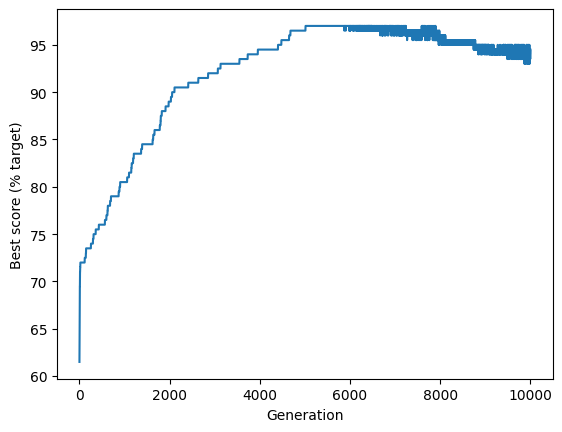

In [121]:
chromosome_length = 200
population_size = 100
maximum_generation = 10000
best_score_progress = [] # Tracks progress

population = create_population(population_size, chromosome_length)
for generation in range(maximum_generation):
    new_population = sorted(population, key=lambda obj: obj.fitness, reverse=True)[:int(population_size/2)]
    scores = []
    for i in range(0, int(population_size/4), 2):
        parent_1 = new_population[i]
        parent_2 = new_population[i+1]
        offspring_1, offspring_2 = parent_1.crossover(parent_2, random.random())
        new_population.append(offspring_1)
        scores.append(offspring_1.fitness)
        new_population.append(offspring_2)
        scores.append(offspring_2.fitness)
    population = new_population
    prob_mutate = 0.2
    population = random_mutate(population, prob_mutate)

    best_score = np.max(scores)/chromosome_length * 100
    best_index = np.argmax(scores)
    best_score_progress.append(best_score)
print(population[best_index].circuit)
# GA has completed required generation
print('End best score, percent target: %.1f' %best_score)

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()